In [84]:
import pandas as pd 
from pandas import DataFrame, Series
import matplotlib as plot
import numpy as np 
import seaborn as sns

In [85]:
train= pd.read_csv('train.csv')

In [86]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [87]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [88]:
!pip install seaborn

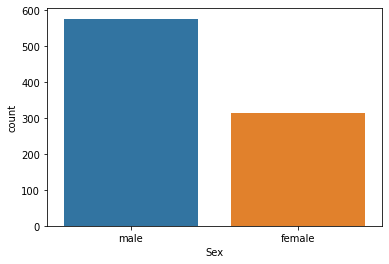

In [89]:
sns.countplot('Sex',data=train)

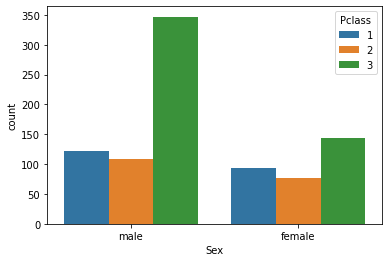

In [90]:
sns.countplot('Sex',data=train, hue='Pclass')

sns.countplot('Pclass',data=train, hue='Sex')

In [91]:
def male_female_child(passenger):
    age,sex = passenger 
    if age < 16:
        return 'child'
    else:
        return sex
    
train['person']= train[['Age','Sex']].apply(male_female_child, axis=1)
#子供という概念を追加する。

In [92]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


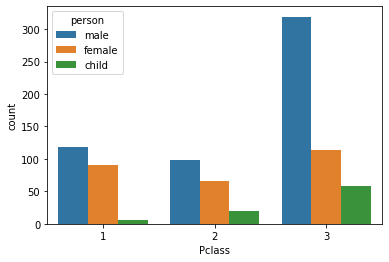

In [93]:
sns.countplot('Pclass', data=train , hue='person')

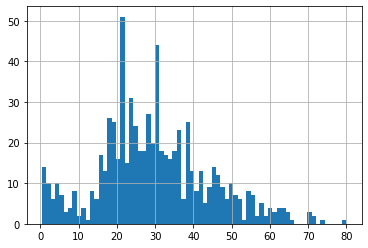

In [94]:
train['Age'].hist(bins=70)

In [95]:
train['Age'].mean()

29.69911764705882

In [96]:
train['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

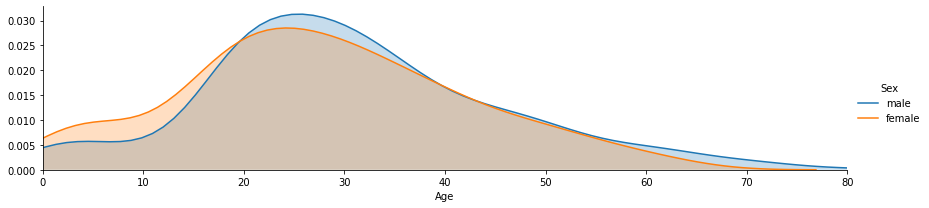

In [97]:
fig=sns.FacetGrid(train, hue = 'Sex', aspect=4)
fig.map(sns.kdeplot,'Age', shade=True)
oldest = train['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

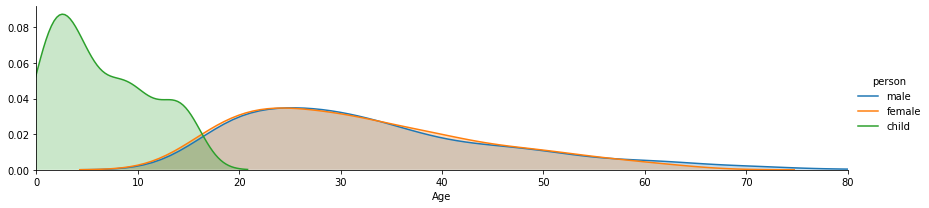

In [98]:
fig=sns.FacetGrid(train, hue = 'person', aspect=4)
fig.map(sns.kdeplot,'Age', shade=True)
oldest = train['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

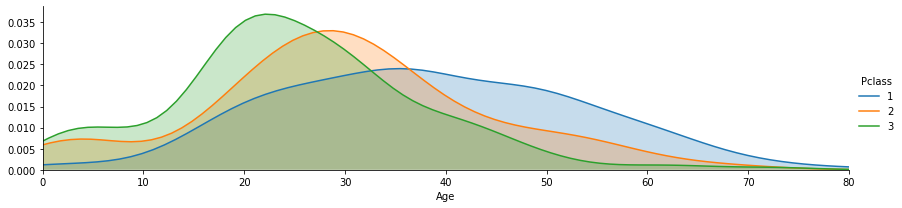

In [99]:
fig=sns.FacetGrid(train, hue = 'Pclass', aspect=4)
fig.map(sns.kdeplot,'Age', shade=True)
oldest = train['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [100]:
deck = train['Cabin'].dropna()

In [101]:
deck

1              C85
3             C123
6              E46
10              G6
11            C103
          ...     
871            D35
872    B51 B53 B55
879            C50
887            B42
889           C148
Name: Cabin, Length: 204, dtype: object

In [102]:
levels = []
for level in deck:
    levels.append(level[0])

In [104]:
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']

In [67]:
cabin_df

,0
0,C
1,C
2,E
3,G
4,C
...,...
199,D
200,B
201,C
202,B


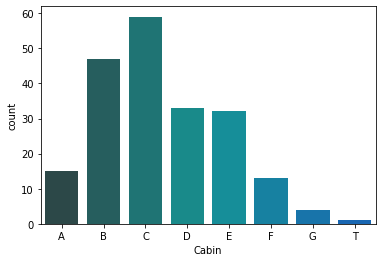

In [108]:
sns.countplot('Cabin',data=cabin_df,palette='winter_d',order=sorted(set(levels)))

In [115]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']
#dataframeは[]で文字列を指定できるが
#python の　attribute のように文字列を指定することもできます。
#Tが外れ値と予想してここではTを取り除いた新しいデータを作ろうとしてる

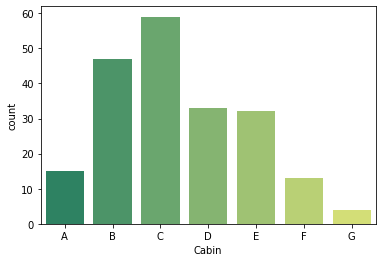

In [116]:
sns.countplot('Cabin',data=cabin_df,palette='summer',order=sorted(set(cabin_df.Cabin)))

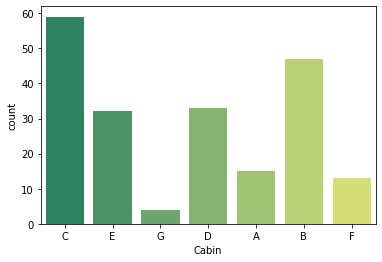

In [117]:
sns.countplot('Cabin',data=cabin_df,palette='summer')#order=sorted(set(cabin_df.Cabin)))
#orderが無いと任意の並びになってしまいます。

In [118]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


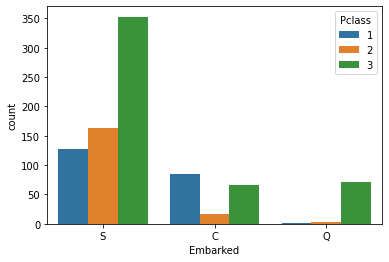

In [120]:
#出港とPclassの関係
sns.countplot('Embarked',data=train, hue = 'Pclass')
#Q townからの人はほとんどが３なのがわかる。　なんの推定に使えるかわからないけど。

In [121]:
from collections import Counter

In [122]:
Counter(train. Embarked)

Counter({'S': 644, 'C': 168, 'Q': 77, nan: 2})

In [123]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [124]:
#null nan volumeをpython は自動で弾いてくれるので上のようにまとめてchekはマル。

In [127]:
train['Alone']=train.Parch + train.SibSp
train['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [129]:
train['Alone'].loc[train['Alone']>0]='With Family'
train ['Alone'].loc[train['Alone']==0]='Alone'

#ここのエラーは気にしなくていい

/Users/wb/.pyenv/versions/3.6.5/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


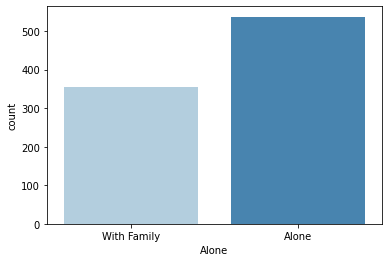

In [130]:
sns.countplot('Alone',data=train,palette='Blues')

In [132]:
train['Survivor']= train.Survived.map({0:'no', 1:'yes'})

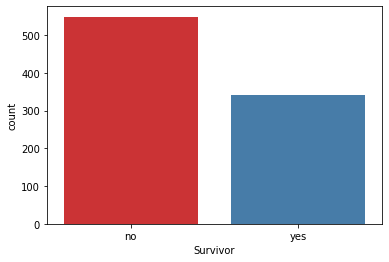

In [136]:
sns.countplot('Survivor',data=train,palette='Set1')

/Users/wb/.pyenv/versions/3.6.5/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


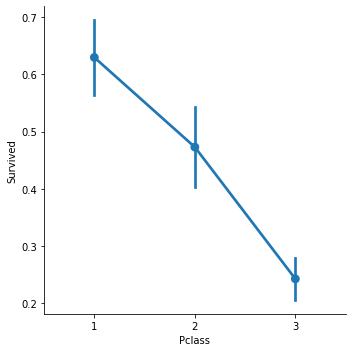

In [142]:
sns.factorplot('Pclass','Survived',data=train,order=[1,2,3])

/Users/wb/.pyenv/versions/3.6.5/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


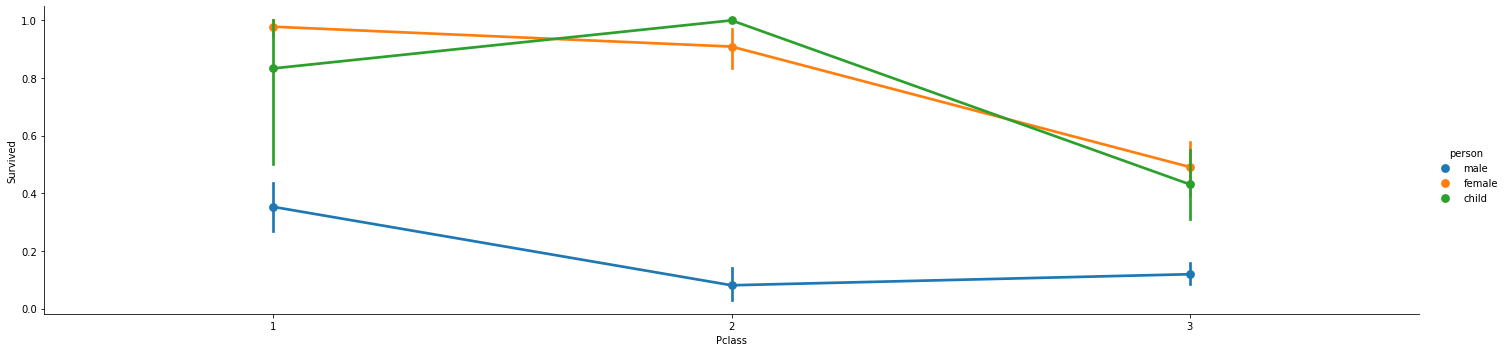

In [145]:
sns.factorplot('Pclass','Survived',hue = 'person',data=train,order=[1,2,3],aspect=4)

/Users/wb/.pyenv/versions/3.6.5/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


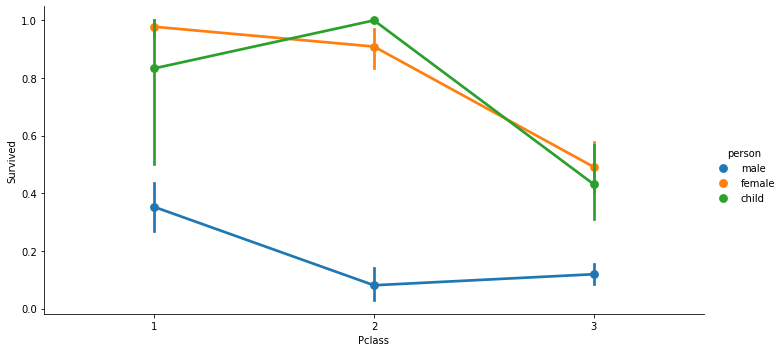

In [146]:
sns.factorplot('Pclass','Survived',hue = 'person',data=train,order=[1,2,3],aspect=2)

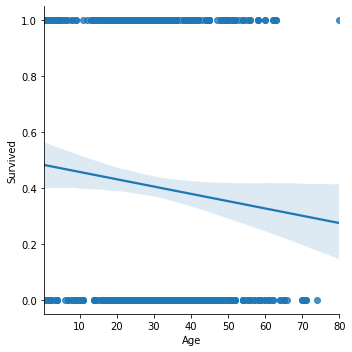

In [147]:
sns.lmplot('Age', 'Survived',data=train)

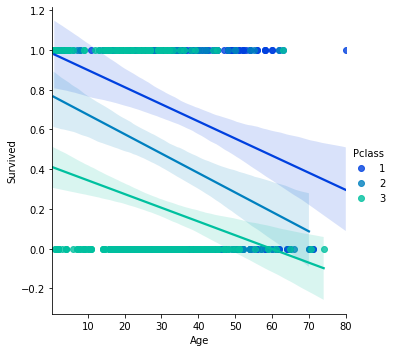

In [167]:
sns.lmplot('Age', 'Survived',hue = 'Pclass',data=train,palette='winter',hue_order=[1,2,3])

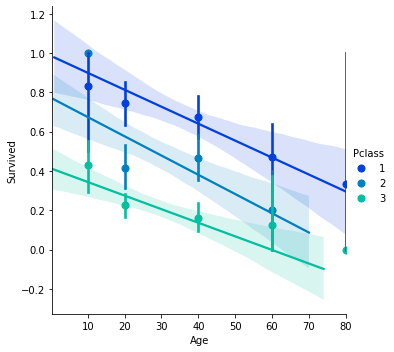

In [169]:
generations=[10,20,40,60,80]
sns.lmplot('Age', 'Survived',hue = 'Pclass',data=train,palette='winter',hue_order=[1,2,3],x_bins=generations)

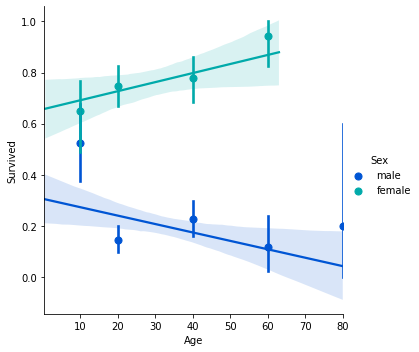

In [162]:
generations=[10,20,40,60,80]
sns.lmplot('Age', 'Survived',hue = 'Sex',data=train,palette='winter',x_bins=generations )

#性別で層別化した生存率が年齢に対してどういう分布なのか？のグラフ